# Tarea 1

## Definir las funciones

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, lagrange
from time import time

# Definimos las funciones
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(-20 * x**2)
f3 = lambda x: 1 / (1 + 25 * x**2)



### Implementar el método de diferencias divididas de Newton


In [ ]:
def newton_divided_diff(x, y):
    n = len(x)
    coeff = np.copy(y)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coeff[i] = (coeff[i] - coeff[i - 1]) / (x[i] - x[i - j])
    return coeff

def newton_polynomial(x, x_points, coeff):
    n = len(coeff)
    poly = coeff[-1]
    for i in range(n - 2, -1, -1):
        poly = poly * (x - x_points[i]) + coeff[i]
    return poly




### Parámetros

In [ ]:

n_points = 21
x_vals = np.linspace(-1, 10, n_points)
x_plot = np.linspace(-1, 10, 5000)



### Métodos de la interpolacion polinomio y sus graficas


Procesando la función sin(x)


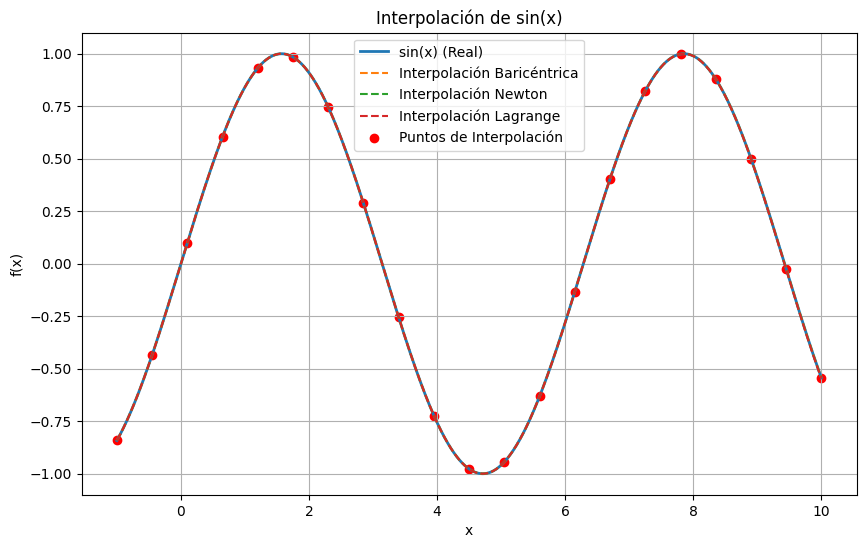

Tiempo Baricéntrico: 0.00434279442 s
Tiempo Newton: 0.000961 s
Tiempo Lagrange: 0.037504 s
Error medio absoluto Baricéntrico: 1.645526e-10
Error medio absoluto Newton: 1.645528e-10
Error medio absoluto Lagrange: 3.192877e-04

Procesando la función exp(-20*x^2)


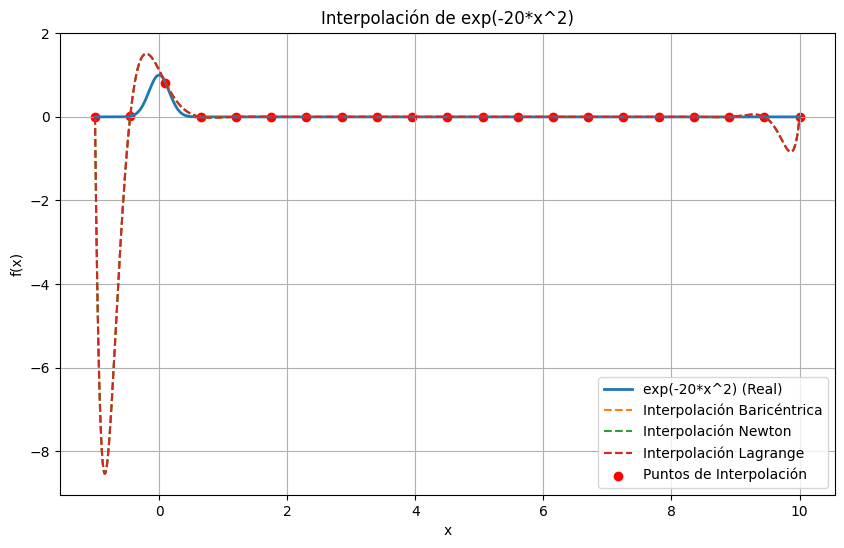

Tiempo Baricéntrico: 0.00598239899 s
Tiempo Newton: 0.000998 s
Tiempo Lagrange: 0.034866 s
Error medio absoluto Baricéntrico: 3.017961e-01
Error medio absoluto Newton: 3.017961e-01
Error medio absoluto Lagrange: 3.017954e-01

Procesando la función 1/(1+25*x^2)


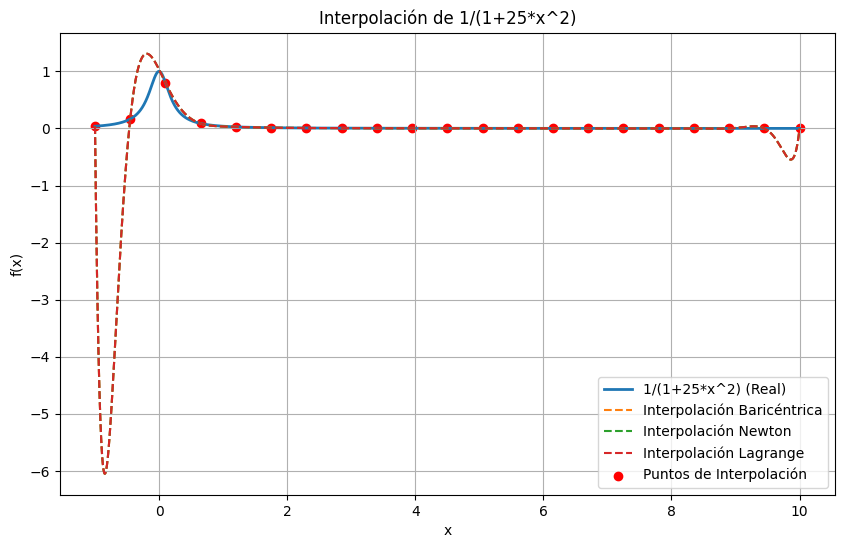

Tiempo Baricéntrico: 0.00592827797 s
Tiempo Newton: 0.001000 s
Tiempo Lagrange: 0.051323 s
Error medio absoluto Baricéntrico: 2.142929e-01
Error medio absoluto Newton: 2.142929e-01
Error medio absoluto Lagrange: 2.143015e-01


In [10]:
functions = [f1, f2, f3]
function_names = ["sin(x)", "exp(-20*x^2)", "1/(1+25*x^2)"]

for func, name in zip(functions, function_names):
    print(f"\nProcesando la función {name}")

    # Valores de la función
    y_vals = func(x_vals)

    # Interpolación baricéntrica
    start_time = time()
    y_bary = barycentric_interpolate(x_vals, y_vals, x_plot)
    bary_time = time() - start_time

    # Interpolación con Newton
    start_time = time()
    coeff = newton_divided_diff(x_vals, y_vals)
    y_newton = newton_polynomial(x_plot, x_vals, coeff)
    newton_time = time() - start_time

    # Interpolación de Lagrange (SciPy)
    start_time = time()
    lagrange_poly = lagrange(x_vals, y_vals)  # Devuelve un polinomio
    y_lagrange = lagrange_poly(x_plot)       # Evalúa el polinomio en los puntos deseados
    lagrange_time = time() - start_time

    # Calcular errores absolutos
    y_true = func(x_plot)
    error_bary = np.abs(y_true - y_bary)
    error_newton = np.abs(y_true - y_newton)
    error_lagrange = np.abs(y_true - y_lagrange)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_true, label=f"{name} (Real)", linewidth=2)
    plt.plot(x_plot, y_bary, label="Interpolación Baricéntrica", linestyle="--")
    plt.plot(x_plot, y_newton, label="Interpolación Newton", linestyle="--")
    plt.plot(x_plot, y_lagrange, label="Interpolación Lagrange", linestyle="--")

    plt.scatter(x_vals, y_vals, color="red", label="Puntos de Interpolación")
    plt.title(f"Interpolación de {name}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()

    # Mostrar resultados
    print(f"Tiempo Baricéntrico: {bary_time:.11f} s")
    print(f"Tiempo Newton: {newton_time:.6f} s")
    print(f"Tiempo Lagrange: {lagrange_time:.6f} s")
    print(f"Error medio absoluto Baricéntrico: {np.mean(error_bary):.6e}")
    print(f"Error medio absoluto Newton: {np.mean(error_newton):.6e}")
    print(f"Error medio absoluto Lagrange: {np.mean(error_lagrange):.6e}")

### El metodo de Chebyshev


Procesando la función sin(x)


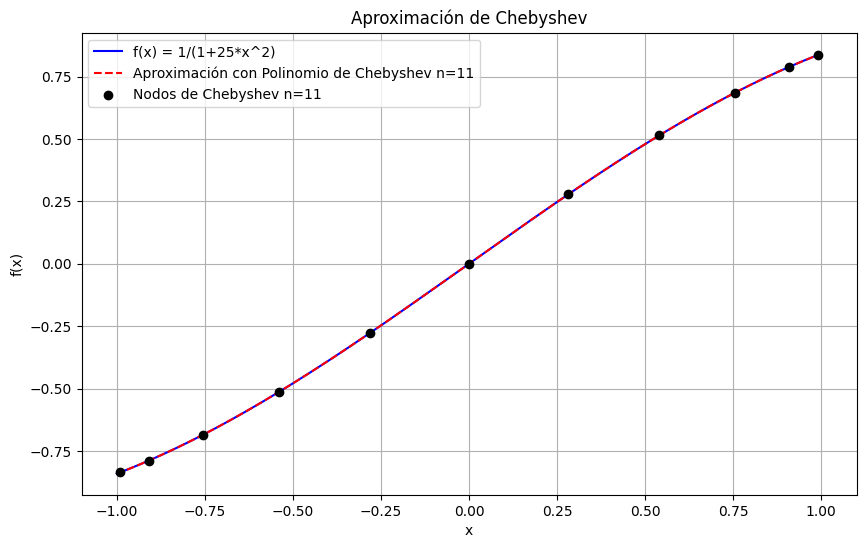


Procesando la función exp(-20*x^2)


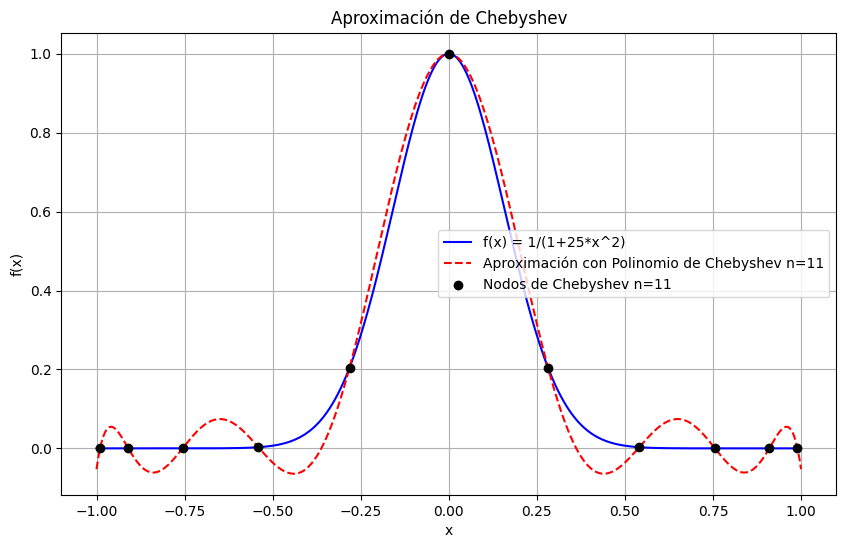


Procesando la función 1/(1+25*x^2)


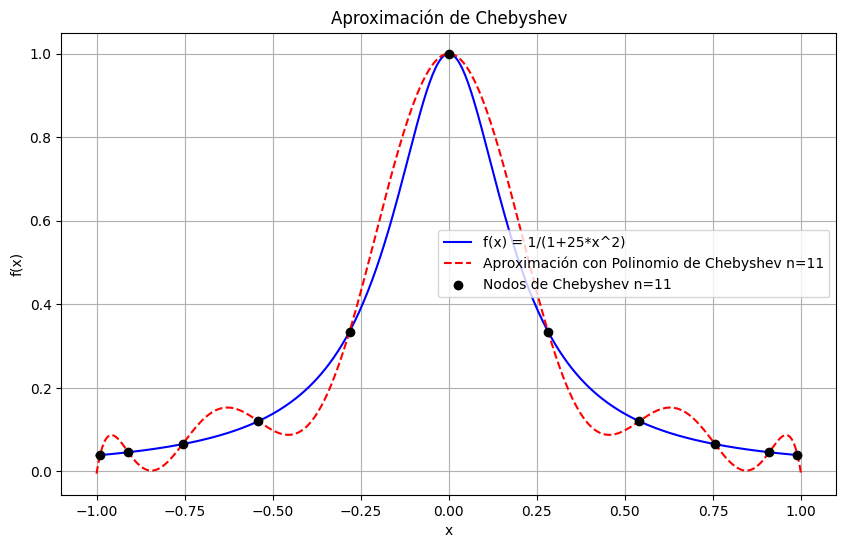

In [5]:
from numpy.polynomial import Chebyshev


# Generamos los nodos de Chebyshev en el intervalo [-1, 1]
def x_chebyshev(n):
    """Generate Chebyshev nodes in the interval [-1, 1]."""
    k = np.arange(n)
    return np.cos((2 * k + 1) * np.pi / (2 * n))

# Generakemos nodos
n = 11
#n2 = 21
nodes_11 = x_chebyshev(n1)

# Transformamos los nodos al intervalo [a, b], por ejemplo, [-1, 1]
a, b = -1, 1
x_chebyshev_transformed_11 = 0.5 * (b - a) * (nodes_11 + 1) + a

functions = [f1, f2, f3]
function_names = ["sin(x)", "exp(-20*x^2)", "1/(1+25*x^2)"]

for func, name in zip(functions, function_names):
    print(f"\nProcesando la función {name}")
   
    # Evaluamos la función en los nodos de Chebyshev
    y_chebyshev_11 = func(x_chebyshev_transformed_11)
    
    # Creamos el polinomio interpolador usando los nodos Chebyshev
    start_time=time()
    chebyshev_polynomial_11 = Chebyshev.fit(x_chebyshev_transformed_11, y_chebyshev_11, deg=n-1)
    chebyshev_time=time()-start_time
    #chebyshev_polynomial_21 = Chebyshev.fit(x_chebyshev_transformed_21, y_chebyshev_21, deg=n-1)
    
    # Crear una serie de puntos para graficar el polinomio
    x_plot = np.linspace(a, b, 500)
    y_plot = func(x_plot)
    

    
    # Evaluamos el polinomio en los puntos de plot
    y_approx_11 = chebyshev_polynomial_11(x_plot)
    
        # Calcular errores absolutos
    
    error_bary = np.abs(y_plot - y_approx_11)
    
    # Graficamos la función original y la aproximación polinómica
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label='f(x) = 1/(1+25*x^2)', color='blue')
    plt.plot(x_plot, y_approx_11, label='Aproximación con Polinomio de Chebyshev n=11', color='red', linestyle='--')
    plt.scatter(x_chebyshev_transformed_11, y_chebyshev_11, color='black', zorder=5, label='Nodos de Chebyshev n=11')
    plt.title('Aproximación de Chebyshev')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.show()


## Tarea 2

### Interpolación con splines 


Procesando la función sin(x)


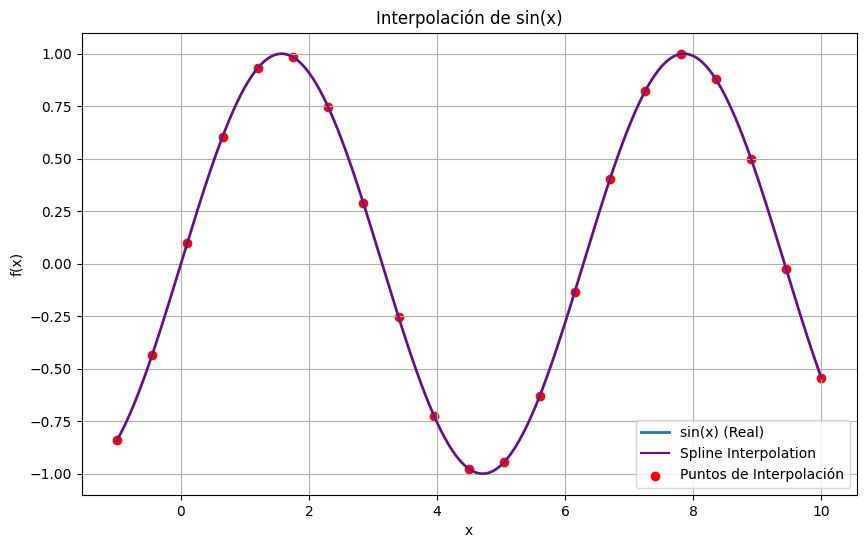

Tiempo Spline: 0.001063 s
Error medio absoluto Spline: 1.244233e-04

Procesando la función exp(-20*x^2)


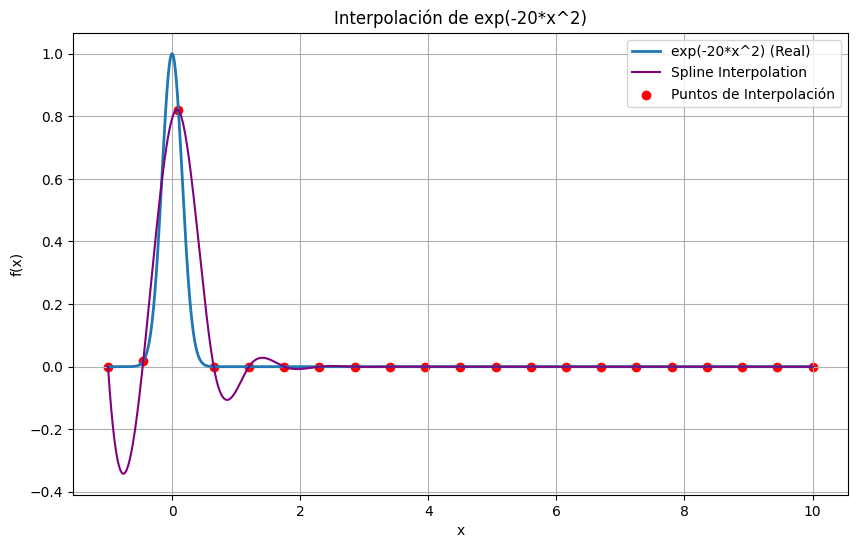

Tiempo Spline: 0.001984 s
Error medio absoluto Spline: 3.463190e-02

Procesando la función 1/(1+25*x^2)


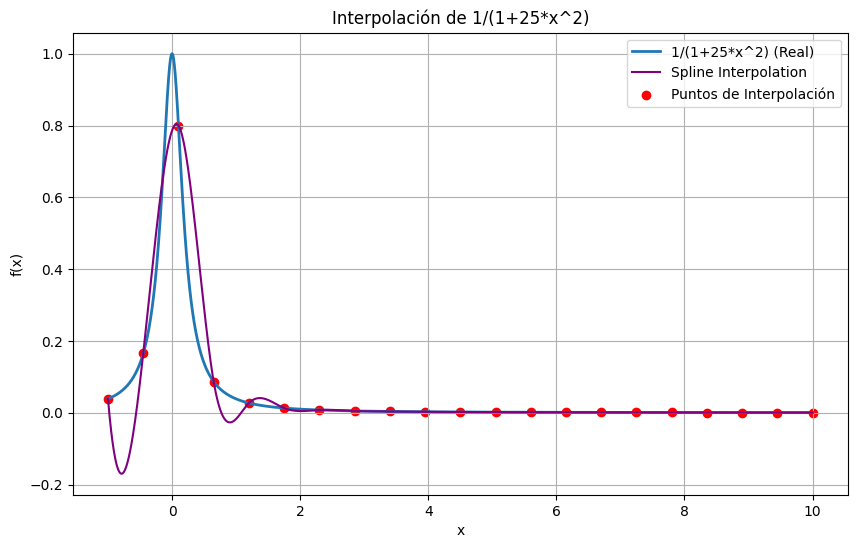

Tiempo Spline: 0.001981 s
Error medio absoluto Spline: 2.494702e-02


In [8]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

from time import time

# Definimos las funciones
f1 = lambda x: np.sin(x)
f2 = lambda x: np.exp(-20 * x**2)
f3 = lambda x: 1 / (1 + 25 * x**2)

# Método de Spline
def spline_interp(x_nodes, y_values, x):
    cs = CubicSpline(x_nodes, y_values)
    return cs(x)


# Parámetros
n_points = 21
x_vals = np.linspace(-1, 10, n_points)
x_plot = np.linspace(-1, 10, 5000)

functions = [f1, f2, f3]
function_names = ["sin(x)", "exp(-20*x^2)", "1/(1+25*x^2)"]

for func, name in zip(functions, function_names):
    print(f"\nProcesando la función {name}")

    # Valores de la función
    y_vals = func(x_vals)

    # Interpolación de Spine
    start_time = time()
    y_spline = spline_interp(x_vals, y_vals, x_plot)

    Spline_time = time() - start_time
    
    

    # Calcular errores absolutos
    y_true = func(x_plot)
    error_spline = np.abs(y_true - y_spline)
    

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_true, label=f"{name} (Real)", linewidth=2)
    plt.plot(x_plot, y_spline, label='Spline Interpolation', linestyle='solid', color='purple')

    plt.scatter(x_vals, y_vals, color="red", label="Puntos de Interpolación")
    plt.title(f"Interpolación de {name}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.show()

    # Mostrar resultados
    print(f"Tiempo Spline: {Spline_time:.6f} s")
  
    print(f"Error medio absoluto Spline: {np.mean(error_spline):.6e}")
